In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv
/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv


In [2]:
pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 MB 28.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.7/450.7 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.4/130.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 104.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: hugging

In [3]:
# Import essential libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import LabelEncoder  # For encoding categorical data
from sklearn.ensemble import RandomForestClassifier  # For building the model
from sklearn.metrics import accuracy_score, classification_report  # For evaluation


# Step 2: Load and Explore the Dataset

In [4]:
# Load the dataset
train_df = pd.read_csv('/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')

# Display basic information about the dataset
print("Training Data Info:")
print(train_df.info())






Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [5]:
# Check the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(train_df.head())


First 5 rows of the dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural     

In [6]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(train_df.isnull().sum())


Missing values in each column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64



# Step 3: Handle Missing Values

In [7]:
# Fill missing values in categorical columns with the mode (most frequent value)
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)

# Fill missing values in numerical columns with the median
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)

# Verify that there are no missing values left
print("\nMissing values after imputation:")
print(train_df.isnull().sum())



Missing values after imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# Step 4: Encode Categorical Variables

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Encode categorical columns with LabelEncoder
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 
                       'Self_Employed', 'Property_Area', 'Loan_Status']

# Apply label encoding to each categorical column
for column in categorical_columns:
    train_df[column] = le.fit_transform(train_df[column])

# Verify the encoding
print("\nFirst 5 rows after encoding:")
print(train_df.head())



First 5 rows after encoding:
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0         

# Step 5: Split the Data into Training and Test Sets

In [9]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = train_df.drop(columns=['Loan_ID', 'Loan_Status'])  # Drop 'Loan_ID' as it is not useful for prediction
y = train_df['Loan_Status']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split by printing the shapes of the datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (491, 11)
Testing data shape: (123, 11)


# Step 6: Train the Model

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)


Accuracy: 0.7561

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



# Step 7: visualization

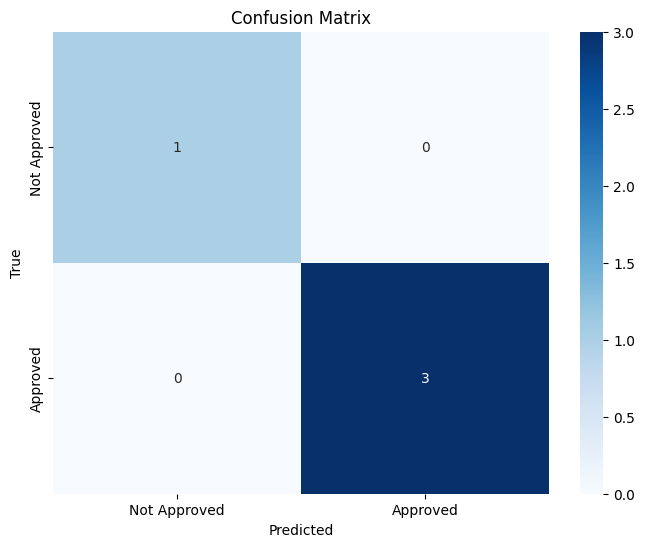

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the labels
y_pred = model.predict(X_imputed)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


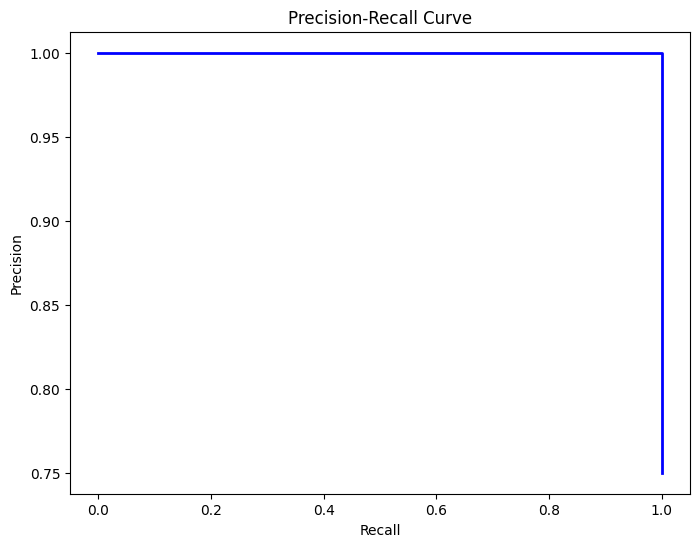

In [17]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y, model.predict_proba(X_imputed)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# Step 8: Deploy the Model with Gradio

In [15]:
import gradio as gr
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Dummy Data (replace with real preprocessing and trained model)
le = LabelEncoder()

# Sample model training data (replace with your real dataset)
data = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Male', 'Female'],
    'Married': ['No', 'Yes', 'Yes', 'No'],
    'Dependents': ['0', '1', '2', '3+'],
    'Education': ['Graduate', 'Not Graduate', 'Graduate', 'Not Graduate'],
    'Self_Employed': ['No', 'Yes', 'No', 'Yes'],
    'ApplicantIncome': [5000, 6000, 7000, 8000],
    'CoapplicantIncome': [0, 2000, 1500, 1800],
    'LoanAmount': [100, 150, 200, 250],
    'Loan_Amount_Term': [360, 360, 360, 360],
    'Credit_History': [1, 0, 1, 1],
    'Property_Area': ['Urban', 'Semiurban', 'Rural', 'Urban'],
    'Loan_Status': [1, 0, 1, 1]
})

# Label Encoding
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Dependents'] = le.fit_transform(data['Dependents'])
data['Education'] = le.fit_transform(data['Education'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])

# Features and Target
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

# Apply SimpleImputer to fill missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train the model with imputed data
model = RandomForestClassifier(random_state=42)
model.fit(X_imputed, y)

# Gradio Prediction Function
def predict_loan(gender, married, dependents, education, self_employed, applicant_income, 
                 coapplicant_income, loan_amount, loan_amount_term, credit_history, property_area):
    
    # Dummy encoding (replace with real encoding)
    gender = 0 if gender == "Male" else 1
    married = 0 if married == "No" else 1
    dependents = int(dependents)
    education = 0 if education == "Graduate" else 1
    self_employed = 0 if self_employed == "No" else 1
    property_area = 0 if property_area == "Urban" else (1 if property_area == "Semiurban" else 2)
    
    input_data = pd.DataFrame([[
        gender, married, dependents, education, self_employed,
        applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history, property_area
    ]], columns=[
        'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'
    ])
    
    # Impute missing values in input data before prediction
    input_data_imputed = imputer.transform(input_data)
    
    # Make prediction
    prediction = model.predict(input_data_imputed)[0]
    return "Approved" if prediction == 1 else "Not Approved"

# Gradio Interface
interface = gr.Interface(
    fn=predict_loan,
    inputs=[
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Radio(["No", "Yes"], label="Married"),
        gr.Dropdown(["0", "1", "2", "3+"], label="Dependents"),
        gr.Radio(["Graduate", "Not Graduate"], label="Education"),
        gr.Radio(["No", "Yes"], label="Self Employed"),
        gr.Number(label="Applicant Income"),
        gr.Number(label="Coapplicant Income"),
        gr.Number(label="Loan Amount"),
        gr.Number(label="Loan Amount Term"),
        gr.Radio(["0", "1"], label="Credit History"),
        gr.Radio(["Urban", "Semiurban", "Rural"], label="Property Area")
    ],
    outputs="text",
    title="Loan Approval Prediction",
    description="Predict whether a loan will be approved based on applicant details."
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7862
Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://d9f8e28e0600b901d9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
